In [1]:
import pandas as pd


import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y, xlabel):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    g = sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    
    g.set(xlabel = xlabel)
    
    new_title = 'Evasão'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['Não', 'Sim']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.show()

def plot_time_bar(col_group, target, title):
    data = df.groupby(['time', col_group]).agg({target:'mean'}).reset_index()
    ax = sns.barplot(x='time', y=target, data=data, hue=col_group)
    ax.set(title=title) 

In [2]:
df = pd.read_csv('/home/ramon/extrator/retencao/retencao.csv')

df = df[df['centro'] == 'CETENS']

df.columns


/home/ramon/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,14,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['matricula', 'periodoLetivo', 'n_rep', 'n_repf', 'n_apr', 'n_tra',
       'mediaFinal', 'anoIngresso', 'periodoingresso', 'prazoConclusao',
       'dataColacaoGrau', 'periodoAtual', 'dataIntegralizacao',
       'modalidadeVaga', 'dataConclusao', 'nomeDiscente', 'dataNascimento',
       'sexo', 'raca', 'cpf', 'ufNaturalidade', 'municipioNaturalidade',
       'segundoGrauAnoConclusao', 'tipoEnsinoMedio', 'formaIngresso',
       'statusDiscente', 'codigoInep', 'curso', 'curriculo', 'is_cotista',
       'periodo', 'anoNascimento', 'idade', 'gap', 'centro', 'municipio',
       'turno', 'is_outra_cidade', 'time', 'total', 'p_rep', 'p_repf', 'p_apr',
       'p_tra'],
      dtype='object')

# Q.1 - Sexo afeta a reprovação?

- Homens tendem a apresentar maiores taxas de reprovação
- Diferença não é estatiscamente significativa

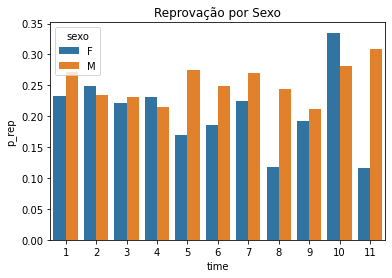

In [3]:
plot_time_bar('sexo', 'p_rep', 'Reprovação por Sexo')   

In [4]:
col = 'sexo'

for time in df.time.unique():

    idx_time = (df.time == time) 
    idx_cat= (df[col] == 'M')

    x = df.loc[(idx_time) & (idx_cat), 'p_rep'].values
    y = df.loc[(idx_time) & (~idx_cat), 'p_rep'].values



    from scipy import stats
    print('%d %.5f'%(time, stats.ttest_ind(x, y)[1]))

1 0.06281
2 0.54235
3 0.73780
4 0.62852
5 0.01317
6 0.16381
7 0.43250
8 0.06364
9 0.82816
10 0.65431
11 0.16212


# Q.2 - Forma de Ingresso (cotista ou ampla concorrência) impacta a reprovação?

- Cotistas possuem maior taxa de reprovação
- Diferença é estatiscamente significativa nos semestres 2,3


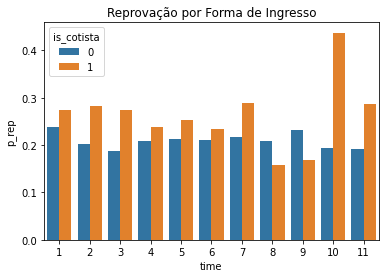

In [5]:
plot_time_bar('is_cotista', 'p_rep', 'Reprovação por Forma de Ingresso')   

In [6]:
col = 'is_cotista'

for time in df.time.unique():

    idx_time = (df.time == time) 
    idx_cat= (df[col] == 1)

    x = df.loc[(idx_time) & (idx_cat), 'p_rep'].values
    y = df.loc[(idx_time) & (~idx_cat), 'p_rep'].values



    from scipy import stats
    print('%d %.5f'%(time, stats.ttest_ind(x, y)[1]))

1 0.09068
2 0.00101
3 0.00270
4 0.37770
5 0.34115
6 0.61931
7 0.21257
8 0.46281
9 0.46667
10 0.02741
11 0.52040


# Q.3 - Cidade de origem impacta a reprovação?

- Discentes de outra cidade possuem maior taxa de reprovação
- Difença não é estatisticamente significativa

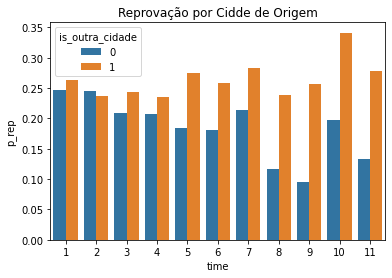

In [7]:
plot_time_bar('is_outra_cidade', 'p_rep', 'Reprovação por Cidde de Origem')   

In [8]:
col = 'is_outra_cidade'

for time in df.time.unique():

    idx_time = (df.time == time) 
    idx_cat= (df[col] == 1)

    x = df.loc[(idx_time) & (idx_cat), 'p_rep'].values
    y = df.loc[(idx_time) & (~idx_cat), 'p_rep'].values



    from scipy import stats
    print('%d %.5f'%(time, stats.ttest_ind(x, y)[1]))

1 0.43534
2 0.76963
3 0.23939
4 0.40833
5 0.02985
6 0.08261
7 0.24246
8 0.07466
9 0.06708
10 0.25500
11 0.31758


# Q.4 - Período de Ingresso (1o ou 2o edição do SISU) impacta a reprovação?

- Discentes que ingressam na 2a edição do SISU apresentam maiores taxas de reprovação
- Diferença é estatisticamente significativa no 1o semestre

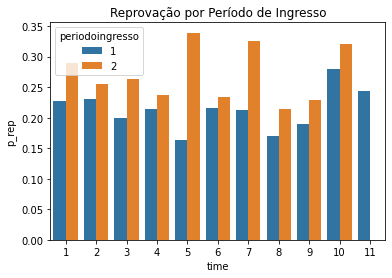

In [9]:
plot_time_bar('periodoingresso', 'p_rep', 'Reprovação por Período de Ingresso')   

In [10]:
col = 'periodoingresso'

for time in df.time.unique():

    idx_time = (df.time == time) 
    idx_cat= (df[col] == 1)

    x = df.loc[(idx_time) & (idx_cat), 'p_rep'].values
    y = df.loc[(idx_time) & (~idx_cat), 'p_rep'].values



    from scipy import stats
    print('%d %.5f'%(time, stats.ttest_ind(x, y)[1]))

1 0.00317
2 0.33647
3 0.02771
4 0.53022
5 0.00003
6 0.69320
7 0.06816
8 0.51795
9 0.65035
10 0.72881
11 nan


/home/ramon/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/ramon/.local/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Q5 - Taxa de reprovação decresce com o tempo?

- Taxa de reprovação tende a decrescer com o tempo

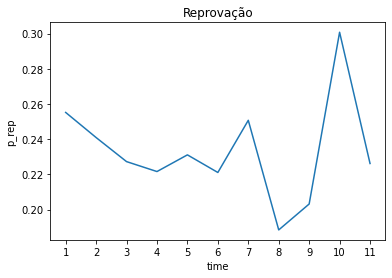

In [11]:
data = df.groupby('time').agg({'p_rep':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='p_rep', data=data)    
ax.set(title='Reprovação')

ax.set_xticks(df['time'].unique())

# Q6 - A idade de ingresso afeta a taxa de reprovação no 1o semestre?

- Taxa de reprovação tende a crescer à medida que a idade aumenta

              p_rep
idade_cat          
(0, 20]    0.210794
(20, 25]   0.286522
(25, 30]   0.318766
(30, 50]   0.268490
(50, 100]  0.331633


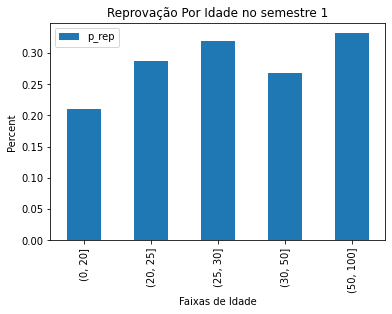

In [12]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

for idx, _df in df.groupby(['time']):
    
    data = _df.groupby(col).agg({'p_rep' : 'mean'})
    print(data)
    ax = data.plot.bar()
    ax.set(ylabel="Percent")
    ax.set(title='Reprovação Por Idade no semestre %d'%(idx), xlabel='Faixas de Idade')
    plt.show()
    break